In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
from collections import Counter

In [2]:
magazine_ch = pd.read_csv('./magazine/final/magazine_Ch.csv', sep='|', encoding = 'utf-8')

In [3]:
mag_ch = magazine_ch[['magazine', 'brand','title', 'link', 'date', 'word_chanel','ADFN']]

In [7]:
mag_ch.head()

,magazine,brand,title,link,date,word_chanel,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로",http://www.allurekorea.com/2020/11/15/%ea%b0%8...,2020-11-15,"메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']"
1,A,Ch,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","['인스타그램', '에디터', '디자이너', '인', '플루', '계정', '막',...","['인스타그램', '에디터', '디자이너', '인', '플루', '계정', '막',..."
2,A,Ch,"올가을 시즌의 주인공, 체인의 활약",http://www.allurekorea.com/2020/10/18/%ec%98%a...,2020-10-18,체인과 진주의 결합으로 우아함을 배가한 CHANEL의 액세서리들.,"['체인', '진주', '결합', '우아함을', 'CHANEL', '액세서리']","['체인', '진주', '결합', '우아함을', 'CHANEL', '액세서리']"
3,A,Ch,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,"생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","['주변', '친구', '좋아하고', '사고', '익숙한', '브랜드', '뭐', ...","['주변', '친구', '좋아하고', '사고', '익숙한', '브랜드', '뭐', ..."
4,A,Ch,가을의 그림자만큼 길어진 롱부츠 12가지,http://www.allurekorea.com/2020/10/02/%ea%b0%8...,2020-10-02,"컬러블록이 조화로운 부츠는 가격미정, CHANEL(CHANEL). 와인색 니하이...","['컬러', '블록', '조화로운', '부츠', 'CHANEL', 'CHANEL',...","['컬러', '블록', '조화로운', '부츠', 'CHANEL', 'CHANEL',..."


In [5]:
mag_ch.loc[0, 'ADFN'][2]

'메'

In [6]:
mag_ch['ADFN_2'] = mag_ch['ADFN']

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
len(mag_ch)

1450

### 쪼개진 단어 붙이기

#### 사전에 등록했으면 하는 단어
['레디 투 웨어', '공방', '트위드', 'FW', 'F/W', 'SS', 'S/S', '오간자', '아름다움', '그랑 팔레', '캐주얼', '런웨이', 
 '오프숄더', '레이어드', '인스타그램', '스타일링']

In [8]:
for word in mag_ch['ADFN_2']:
    if "'방'" in word:
        print(word)
        print('-'*50)

['CHANEL', '앰배서더', '배우', '김고은', 'CHANEL', '가을', '겨울', '룩', '쇼', '참석', '캐멀', '컬러', '캐시미어', '카디건', '화이트', '주름', '스커트', '평소', '지적', '아름다운', '배우', '이미지', '후문', '주름', '장식', '화이트', '스커트', '여름날', '날렵한', '샌들', '경쾌한', '분위기', 'CHANEL', '파리', '뉴욕', '방', '쇼', '참석', '위너', '멤버', '개성', '스타일', '송민호', '블루', '컬러', '캐시미어', '풀', '오버', '자유로운', '분위기', '강승윤', '블랙', '컬러', '울', '코트', '진중하면서도', '세련된', '이미지', '부각', '진우', '단정한', '카디건', '챙', '넓은', '모자', '트위스트', '이승훈', '화이트', '블라우스', '볼드', '크리스', '더해', '화려한', '스타일', '멋', '소화']
--------------------------------------------------
['목표', '정해', '인스타그램', '도매', '시장', '떼', '온', '옷', '정도', '사업', '버질', '아블', '패션계', '핫', '스타', '교류', '레이블', '론칭하', '아티스트', '라면', '동대문', '시장', '가라', '인스타그램', '여성', '좋아할', '만', '원피스', '스커트', '걸', '좋은', '가방', 'CHANEL', '에르메스', '신상', '핸드백', '인스타그램', '업로드', '하라', '포즈', '수줍은', '척', '장소', '도서관', '카페', '야외', '테라스', '정도', '무난', '걸', '천', '번', '반복', '자연', '인스타그램', '계정', '쇼핑몰', '링크', '옷', '팔고', '발견', '게', '아티스트', '수준', '라면', '동대문', '시장', '대신', '빈티', '숍', '가

In [9]:
# 스타일링
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'스타', '일링'", "스타일링")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# 레디 투 웨어
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'레디', '투', '웨어'", "레디투웨어")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# 트위드
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'트', '위드'", "트위드")

# 캐주얼
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'캐, '주얼'", "캐주얼")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
# FW / SS
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'F', 'W'", "FW")
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'S', 'S'", "SS")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# 스포티
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'스포', '티'", "스포티")

mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'벨루', '티'", "벨루티")
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'베네', '티'", "베네티")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [14]:
# 테일러 / 레이어
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'테일러', '드'", "테일러드")
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'에스', '닉'", "에스닉")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [15]:
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace('빈티', "빈티지")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
mag_ch['ADFN_2'] = mag_ch['ADFN_2'].str.replace("'방'", "'공방'")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
mag_ch.to_csv('./magazine/final/magazine_ch_stickword.csv', sep='|', encoding ='utf-8', index=False)

In [25]:
mag_ch['word'] = mag_ch['word_chanel']

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
mag_CH = mag_ch[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [18]:
tot_je = pd.read_csv('./magazine/final/video_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [28]:
tot_je['word'] = tot_je['word_jenny']

In [29]:
tot_JE = tot_je[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [69]:
len(tot_JE)

351

In [31]:
CHJE = pd.concat([mag_CH, tot_JE])

In [35]:
CHJE.reset_index(drop = True, inplace = True)

In [32]:
CHJE.to_csv('./magazine/final/CHJE.csv', sep = '|', encoding = 'utf-8', index = False)

In [70]:
len(CHJE)

1801

## stopword 추가

In [43]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [44]:
sw_df.columns = ['stopword']

In [45]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [46]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [47]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [48]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘']
for w in add_0:
    stop_words.append(w)

In [49]:
add_1 = ['BLACKPINK', '리사', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [50]:
len(stop_words)

822

In [51]:
CHJE['ADFN_2'] = CHJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

AttributeError: Can only use .str accessor with string values!

In [52]:
noun_adj_list = []
for i in range(len(CHJE)):
    for word in CHJE.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [53]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 9423), ('CHANEL', 5757), ('귀엽다', 2144), ('예쁘다', 1820), ('브랜드', 1012), ('사랑', 1008), ('KARL', 882), ('모델', 794), ('쇼', 769), ('스타일', 768), ('장식', 748), ('얼굴', 746), ('백', 723), ('옷', 685), ('매력', 684), ('드레스', 681), ('컬러', 673), ('룩', 645), ('무대', 642), ('블랙', 564), ('파리', 563), ('여성', 555), ('노래', 518), ('재킷', 494), ('트위드', 492), ('디자이너', 484), ('디자인', 478), ('COUTURE', 440), ('주얼리', 439), ('아이템', 434), ('코코', 427), ('화이트', 423), ('새로운', 414), ('눈', 411), ('세계', 408), ('잘', 408), ('여자', 407), ('처음', 400), ('느낌', 399), ('아이돌', 395), ('시작', 388), ('하우스', 381), ('걸', 365), ('다양한', 346), ('GABRIELLE', 344), ('공방', 339), ('영화', 338), ('팬', 323), ('젠득', 322), ('럭셔리', 318), ('팬츠', 316), ('완성', 316), ('의상', 316), ('영감', 310), ('분위기', 309), ('머리', 309), ('크루즈', 309), ('많은', 297), ('실력', 294), ('VIRGINIE', 293), ('봄', 287), ('스커트', 285), ('착용', 281), ('프랑스', 280), ('최고', 276), ('디렉터', 275), ('좋은', 274), ('영어', 274), ('한국', 273), ('헤어', 271), ('스타일링', 269), ('슈즈', 269), ('골드', 268), ('가방'

In [54]:
count = Counter(noun_adj_list)

In [55]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('제니', 9423)
('CHANEL', 5757)
('귀엽다', 2144)
('예쁘다', 1820)
('브랜드', 1012)
('사랑', 1008)
('KARL', 882)
('모델', 794)
('쇼', 769)
('스타일', 768)
('장식', 748)
('얼굴', 746)
('백', 723)
('옷', 685)
('매력', 684)
('드레스', 681)
('컬러', 673)
('룩', 645)
('무대', 642)
('블랙', 564)
('파리', 563)
('여성', 555)
('노래', 518)
('재킷', 494)
('트위드', 492)
('디자이너', 484)
('디자인', 478)
('COUTURE', 440)
('주얼리', 439)
('아이템', 434)
('코코', 427)
('화이트', 423)
('새로운', 414)
('눈', 411)
('세계', 408)
('잘', 408)
('여자', 407)
('처음', 400)
('느낌', 399)
('아이돌', 395)
('시작', 388)
('하우스', 381)
('걸', 365)
('다양한', 346)
('GABRIELLE', 344)
('공방', 339)
('영화', 338)
('팬', 323)
('젠득', 322)
('럭셔리', 318)
('팬츠', 316)
('완성', 316)
('의상', 316)
('영감', 310)
('분위기', 309)
('머리', 309)
('크루즈', 309)
('많은', 297)
('실력', 294)
('VIRGINIE', 293)
('봄', 287)
('스커트', 285)
('착용', 281)
('프랑스', 280)
('최고', 276)
('디렉터', 275)
('좋은', 274)
('영어', 274)
('한국', 273)
('헤어', 271)
('스타일링', 269)
('슈즈', 269)
('골드', 268)
('가방', 267)
('첫', 262)
('링', 259)
('핑크', 256)
('여름', 255)
('패션', 255)
('클래식', 2

In [56]:
top500 = pd.DataFrame(word_list)

In [57]:
top500.columns = ['word', 'count']

In [66]:
top500.to_csv('./CHJE_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [59]:
import matplotlib.pyplot as plt

In [60]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [61]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [62]:
from wordcloud import WordCloud

In [63]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

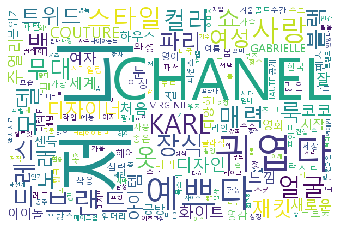

In [64]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('CHJE_total.png')

In [71]:
CHJE.to_csv('./magazine/final/CHJE_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)